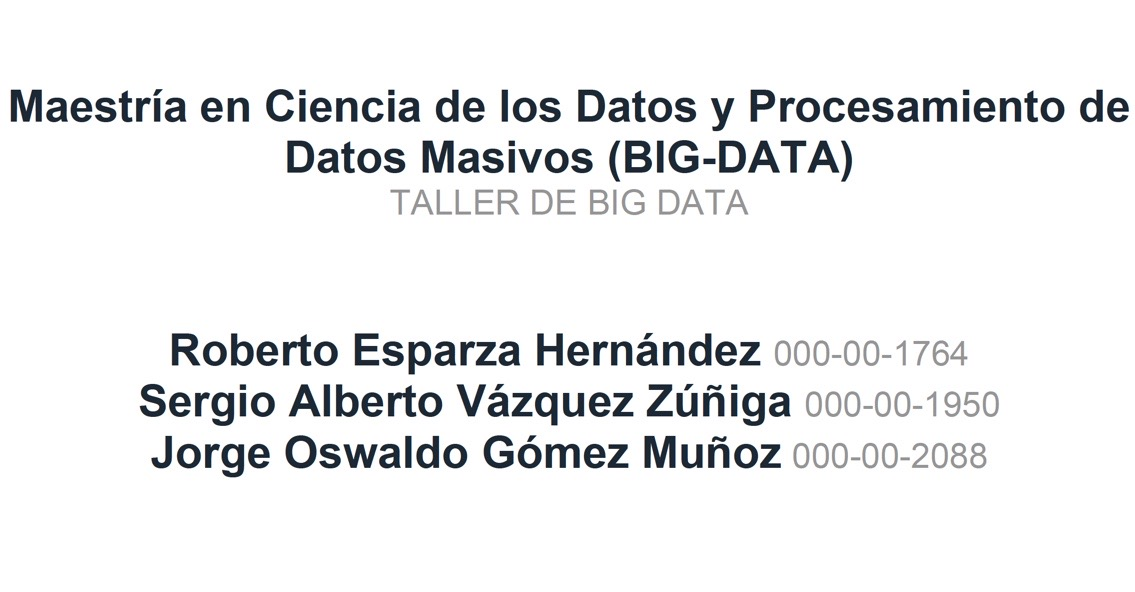

In [52]:
library("IRdisplay")
display_png(file="portada.jpeg")  

In [ ]:
# Tarea Big Data

### Importar Librerias

In [1]:
suppressWarnings(suppressMessages(library(ff)))
suppressWarnings(suppressMessages(library(ffbase)))
suppressWarnings(suppressMessages(library(biglm)))

## Punto 1. Con el paquete ff en R genere una matriz M de tamaño 1,000 X 10,000

### Cárguela con números aleatorios.

In [2]:
M <- ff(rnorm(1000*10000), dim=c(1000,10000))

### Calcule para 4 columnas tomadas al azar de la matriz M los índices mean(), sd() y el max().

Creamos una función que obtenga una columna aleatoria de la matriz, y nos devuelva las 3 estadísticas requeridas.

In [3]:
set.seed('4')
estadisticas_cols <- function() {
    col1=M[,sample(1:10000, 1)]
    print(c('promedio',mean(col1)))
    print(c('desviación estandar',sd(col1)))
    print(c('máximo',max(col1)))
    cat('\n')
}

In [4]:
# Columna 1
estadisticas_cols()
# Columna 2
estadisticas_cols()
# Columna 3
estadisticas_cols()
# Columna 4
estadisticas_cols()

[1] "promedio"            "-0.0210036463070538"
[1] "desviación estandar" "0.98601044649252"   
[1] "máximo"           "2.82557970279769"

[1] "promedio"           "0.0388421250440192"
[1] "desviación estandar" "0.990491424893747"  
[1] "máximo"           "2.99460697534941"

[1] "promedio"           "0.0430724213563583"
[1] "desviación estandar" "0.998864330099548"  
[1] "máximo"           "3.19056575494656"

[1] "promedio"           "0.0200813066632704"
[1] "desviación estandar" "1.01749025324606"   
[1] "máximo"          "2.9207015153977"



### Para 2 columnas al azar c1 y c2 calcule cor( M[,c1],M[,c2] ) y explique la Correlación encontrada.

In [5]:
col1=M[,sample(1:10000, 1)]
col2=M[,sample(1:10000, 1)]
cor(col1,col2)

[1] -0.005341592

### Realice un gráfico tipo plot con 2 columnas tomadas al azar de la matriz M. Explique el Resultado plasmado en la gráfica


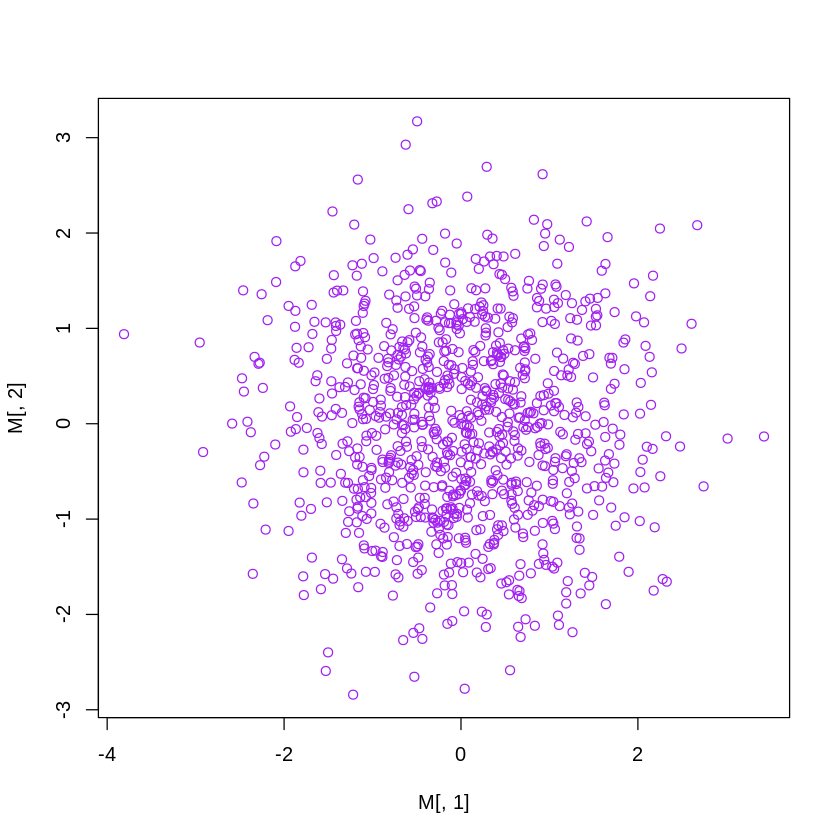

In [6]:
plot(M[,1],M[,2], col = "purple")

#### Como cada elemento de la matriz fue generado con números aleatorios y una distribución normal(0,1), entonces vemos una mayor concentración de puntos justo en el centro como era de esperarse

In [7]:
random_dataframe <- as.data.frame(M[,1:2])
random_dataframe_ff <- as.ffdf(random_dataframe)
class(random_dataframe_ff)
head(random_dataframe_ff)

[1] "ffdf"

,V1,V2
,<dbl>,<dbl>
1,-0.1121566,1.0551206
2,1.1893058,-1.8853199
3,0.1408831,0.7720563
4,0.9055074,1.4156951
5,0.9811270,0.4241028
6,-1.1391103,-0.7720967


In [8]:
mymodel <- biglm(V1 ~ V2, data = random_dataframe_ff)
summary(mymodel)

Large data regression model: biglm(V1 ~ V2, data = random_dataframe_ff)
Sample size =  1000 
               Coef   (95%    CI)     SE      p
(Intercept)  0.0008 -0.064 0.0655 0.0324 0.9810
V2          -0.0154 -0.080 0.0491 0.0323 0.6326

### Aquí estamos tomando la variavle v1 como la dependiente y la v1 como la dependiente y v1 como la independiente

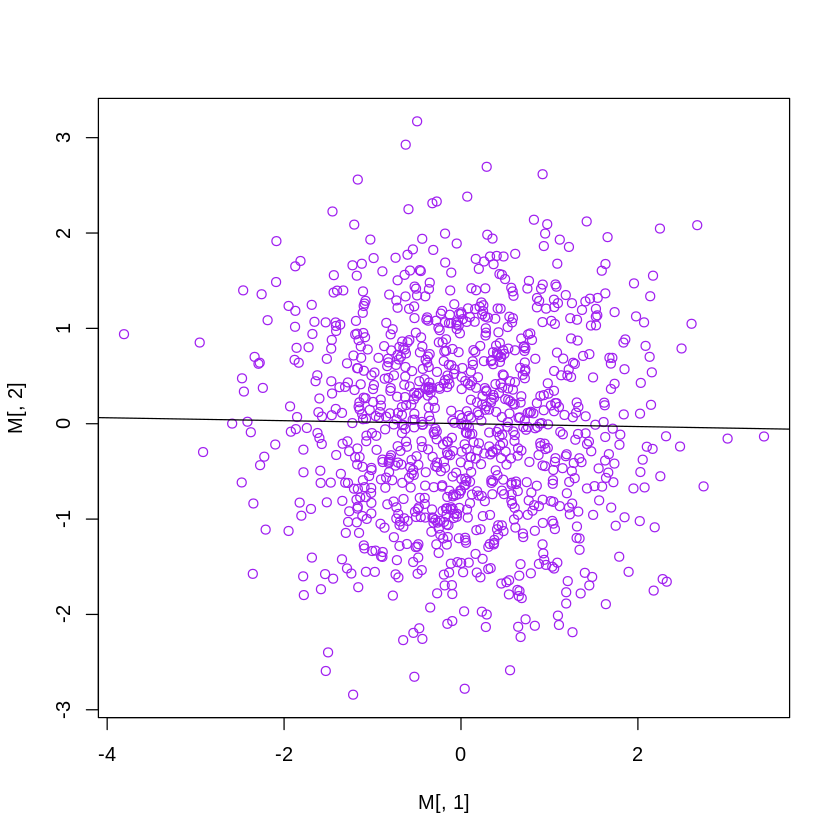

In [9]:
plot(M[,1],M[,2], col = "purple")
abline(mymodel)

### Como era de esperarase, obtenemos una linea horizontal ya que solo tenemos números aleatorios

## Punto 2. El alumno deberá explicar, analizar, implementar, evaluar  y comparar una máquina con aprendizaje no supervisado en paralelo considerando el método de clasificación jerárquica

In [10]:
#install.packages('snow',dependencies=TRUE)
#install.packages('MASS',dependencies=TRUE)
library(MASS)
library(snow)

Warning message:
“package ‘MASS’ was built under R version 4.0.3”


### Usando lapply y la funcion hclust construya 7 árboles binarios con los métodos ward, single, complete, average, mcquitty, median y centroid, mida el tiempo de ejecución y grafique los 7 árboles en una sola ventana.

In [23]:
iris <- datasets::iris
iris2 <- iris[,-5]
species_labels <- iris[,5]
library(colorspace) # get nice colors
library(dendextend)
species_col <- rev(rainbow_hcl(3))[as.numeric(species_labels)]

#### Usando un for loop

In [12]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")
d_iris <- dist(iris2) # method="man" # is a bit better

iris_dendlist <- dendlist()
for(i in seq_along(hclust_methods)) {
   hc_iris <- hclust(d_iris, method = hclust_methods[i])   
   iris_dendlist <- dendlist(iris_dendlist, as.dendrogram(hc_iris))
}
names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

$single
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

$complete
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

$average
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

$mcquitty
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

$median
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

$centroid
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

$ward.D2
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"

#### Usando la función lapply

Debemos de modificar el código ligeramente, aunque utilizar lapply es más intuitivo y podemos simplificar bastante el código. 

Por otro lado, prácticamente deja el código listo para utilzar cómputo en paralello con mínimas modificaciones

In [24]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")

hc_iris <- lapply(hclust_methods, function(method) hclust(d_iris, 
        method = method))
                      
iris_dendlist <- dendlist()
iris_dendlist <- lapply(hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc)))

names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

attr(,"class")
[1] "dendlist"

$single
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

attr(,"class")
[1] "dendlist"

$complete
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

attr(,"class")
[1] "dendlist"

$average
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

attr(,"class")
[1] "dendlist"

$mcquitty
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

attr(,"class")
[1] "dendlist"

$median
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

attr(,"class")
[1] "dendlist"

$centroid
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

attr(,"class")
[1] "dendlist"

$ward.D2
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"


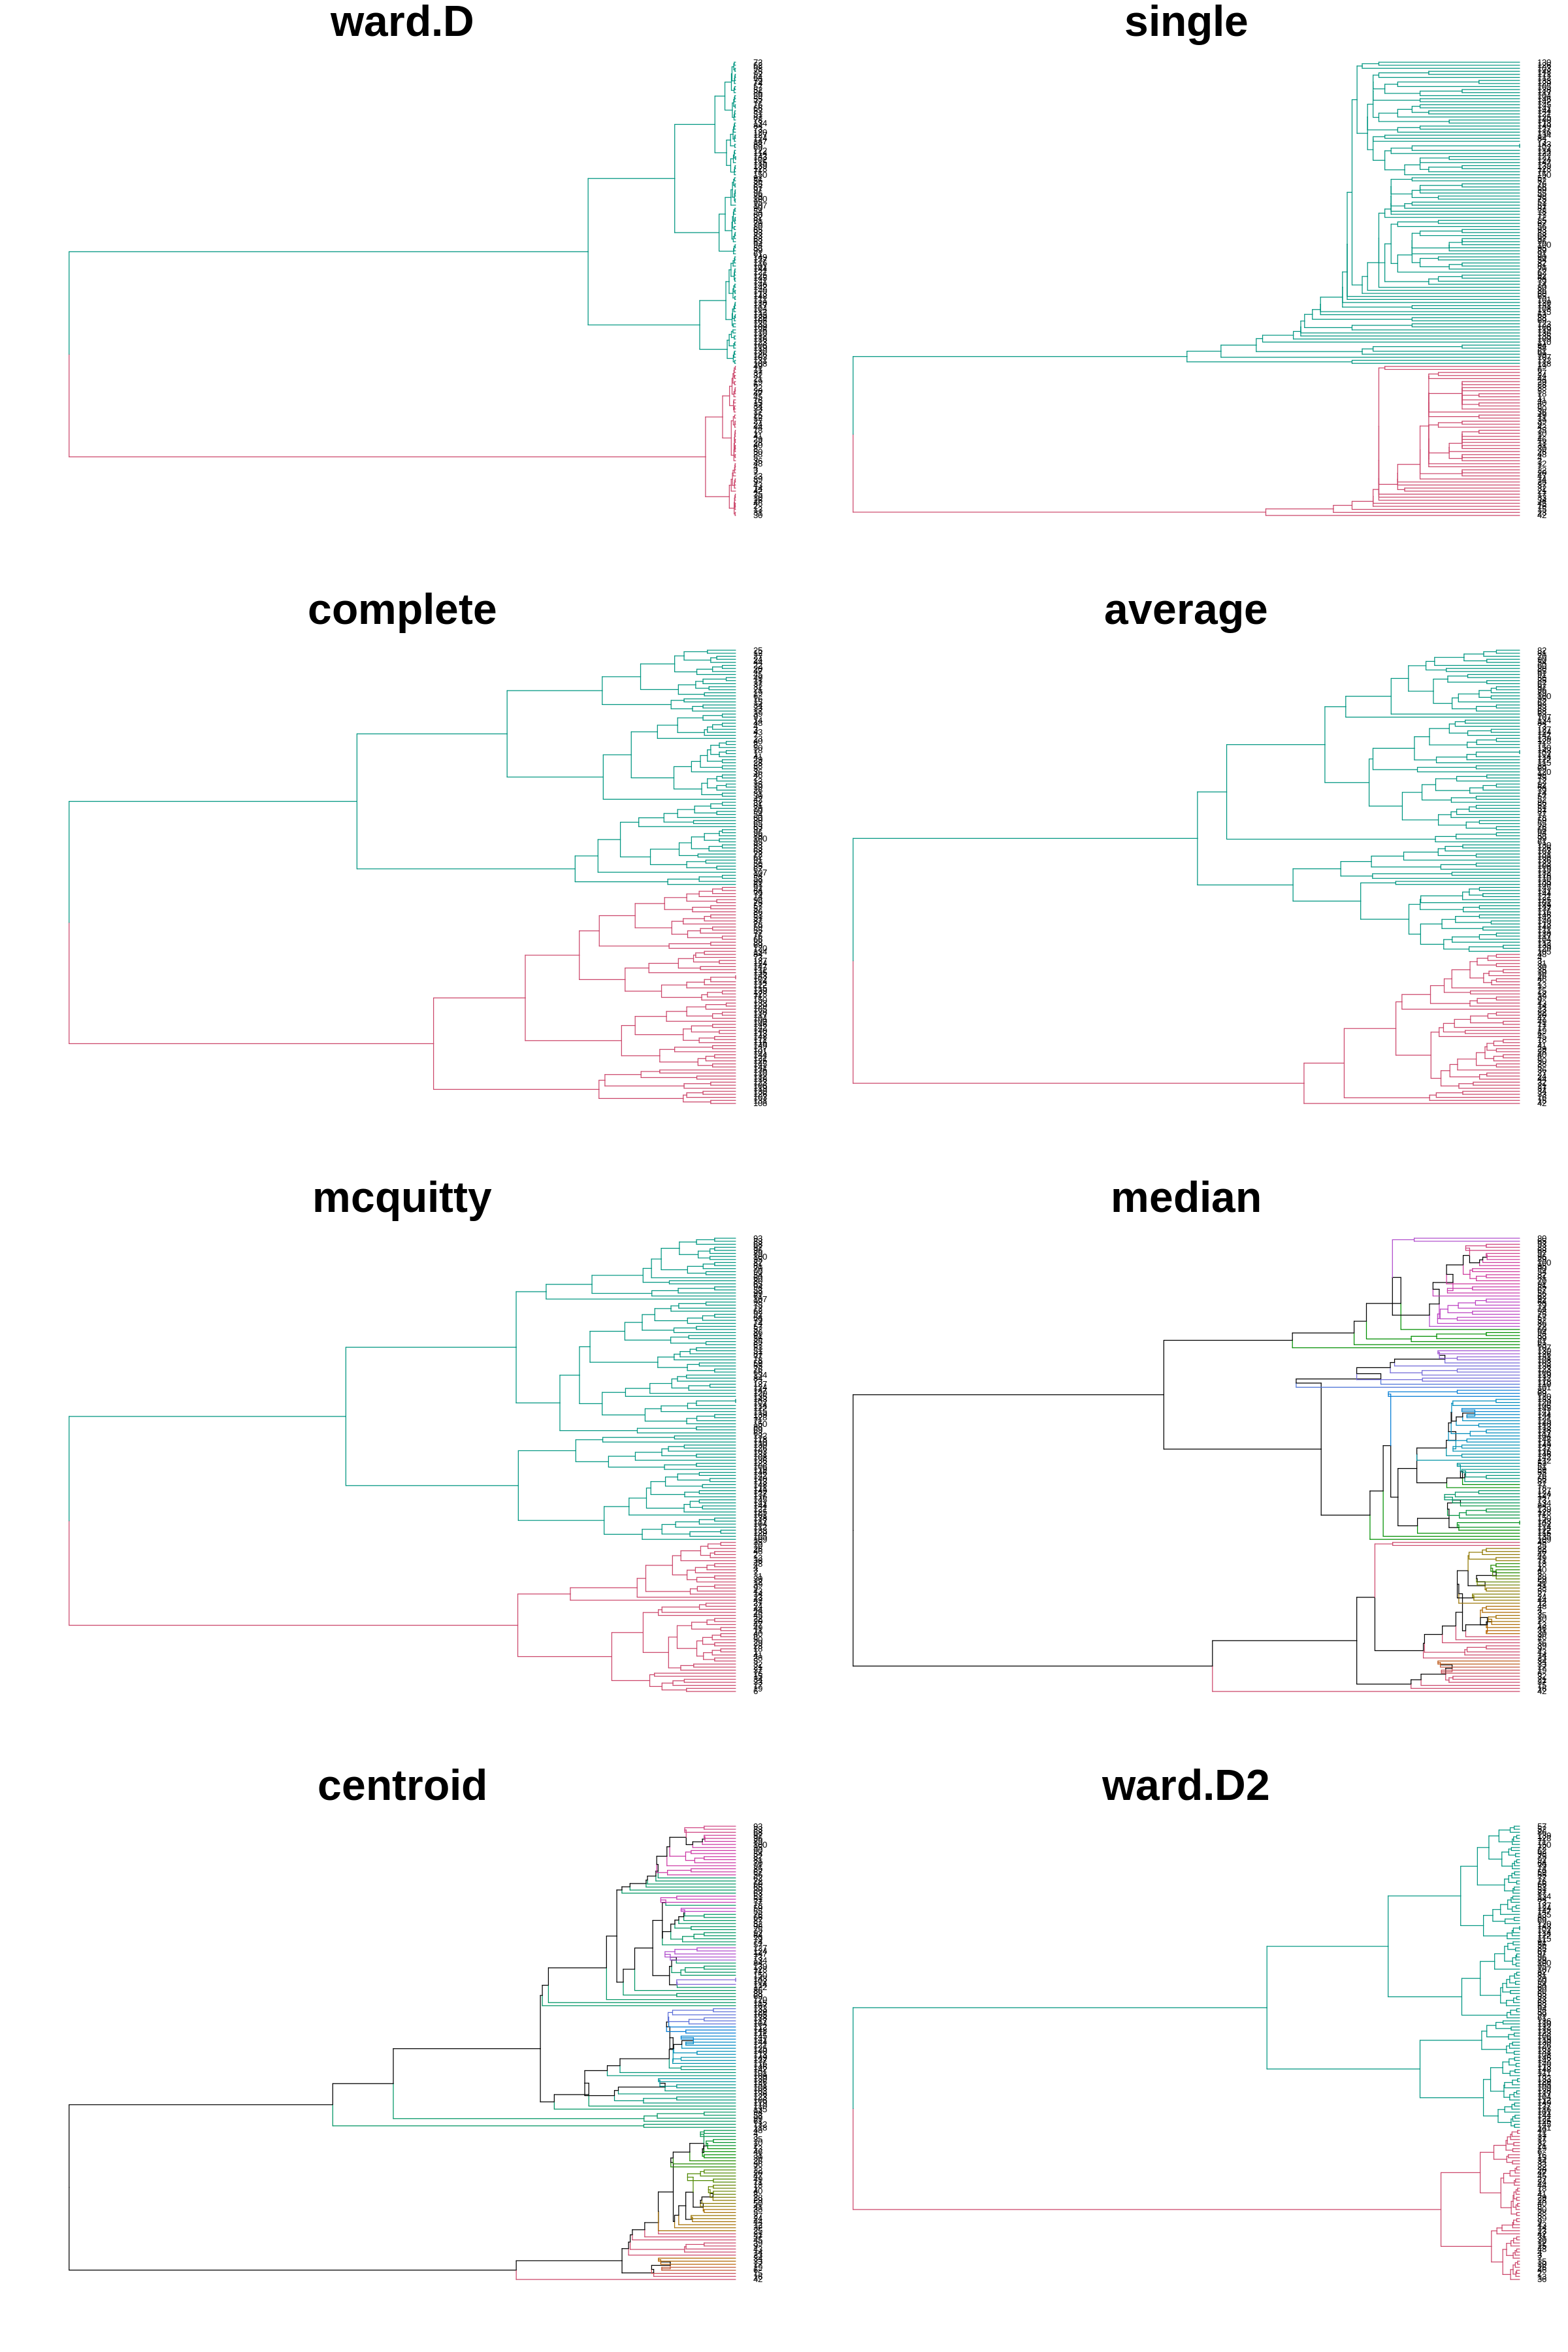

In [25]:
par(mfrow = c(4,2),cex.lab=10, cex.main=5)
options(repr.plot.width = 20)
options(repr.plot.height = 30)
for(i in 1:8) {
   iris_dendlist[[i]] %>% set("branches_k_color", k=2) %>% plot(axes = FALSE, horiz = TRUE)
   title(names(iris_dendlist)[i])
}


### Usando clusterApply del paquete snow paralelice el proceso anterior usando 8 peones o procesadores, mida el tiempo de ejecución y compárelo con el anterior

In [26]:
# usaremos 8 'peones' en una máquina local usando un 'socket'
cl <- makeCluster(8, type = "SOCK")
# carga el paquete MASS en cada peón haciendo visibles la Tabla de Datos
# Boston en cada peón o procesador
ignore <- clusterEvalQ(cl, {
library(dendextend)
iris <- datasets::iris
iris2 <- iris[,-5]
d_iris <- dist(iris2) # method="man" # is a bit better
iris_dendlist <- dendlist()
})


#### Ahora haciéndolo en paralelo



In [27]:
hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")

hc_iris <- clusterApply(cl, hclust_methods, function(method) hclust(d_iris, 
        method = method))
                      

iris_dendlist <- clusterApply(cl, hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc)))

names(iris_dendlist) <- hclust_methods
iris_dendlist

$ward.D
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 199.6205 

attr(,"class")
[1] "dendlist"

$single
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 1.640122 

attr(,"class")
[1] "dendlist"

$complete
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 7.085196 

attr(,"class")
[1] "dendlist"

$average
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.062683 

attr(,"class")
[1] "dendlist"

$mcquitty
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 4.497283 

attr(,"class")
[1] "dendlist"

$median
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.82744 

attr(,"class")
[1] "dendlist"

$centroid
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 2.994307 

attr(,"class")
[1] "dendlist"

$ward.D2
[[1]]
'dendrogram' with 2 branches and 150 members total, at height 32.44761 

attr(,"class")
[1] "dendlist"


In [28]:
stopCluster(cl)  # Finaliza la computación paralela


### Comparando los tiempos

#### Primero correrremos esto de manera habitual

In [18]:
iris <- datasets::iris

system.time(lapply(hclust_methods, function(method) hclust(d_iris, 
        method = method)))
iris_dendlist <- dendlist()
system.time(lapply(hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc))))

   user  system elapsed 
  0.007   0.000   0.007 

   user  system elapsed 
  0.035   0.000   0.035 

#### Ahora lo corremos utilizando cómputo en parallelo con 8 peones

In [19]:
# usaremos 8 'peones' en una máquina local usando un 'socket'
cl <- makeCluster(8, type = "SOCK")
# Vamos a cargar el conjunto iris dentro de cada uno de los peones. 
ignore <- clusterEvalQ(cl, {
library(dendextend)
iris <- datasets::iris
d_iris <- dist(iris) # method="man" # is a bit better
iris_dendlist <- dendlist()
})
system.time(
hc_iris <- clusterApply(cl, hclust_methods, function(method) hclust(d_iris, 
        method = method)))
                      

system.time(iris_dendlist <- clusterApply(cl, hc_iris, function(hc) dendlist(iris_dendlist, 
        as.dendrogram(hc))))                             
stopCluster(cl)  # Finaliza la computación paralela


   user  system elapsed 
  0.001   0.001   0.004 

   user  system elapsed 
  0.004   0.001   0.015 

### Podemos observar que el proceso que se realizó sin utilizar el cómputo en paralelo fue 75% y 230% más tardado respectivsmente. La diferencia sin duda sería mayor para cuando se trabaje con una mayor cantidad de datos, aunque para ilustrar el concepto queda en evidencia el beneficio

Repita el proceso anterior utilizando Snow o RHadoop en forma distribuida.

- El proceso anterior fue realizado con makeCluster quer formar parte del la librería Snow

#### ref

Galili, T. (2020). Hierarchical cluster analysis on famous data sets - enhanced with the dendextend package. Retrieved 17 April 2021, from https://cran.r-project.org/web/packages/dendextend/vignettes/Cluster_Analysis.html